In [2]:
import os
import struct
import numpy as np
import pandas as pd

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 'images_mnist.idx3-ubyte')
        fname_lbl = os.path.join(path, 'labels_mnist.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

#Reading the training data

In [3]:
train_data = list(read(dataset='training',path='.'))
print type(train_data)

<type 'list'>


# Selecting 10k random points from data

In [4]:
import random
index=[]
sample= random.sample(range(0,59999),9999)
i=0
while i<len(sample):
    index.append(sample[i])
    i+=1

In [5]:
i=0
label=[]
#arr=np.ndarray([])
#arr = np.empty((0,784), int)
arr=np.empty((0))
arr = np.append(arr,train_data[0][1])
label.append(0)
while i < 9999:
    j=index[i]
    t1,t2=train_data[j]
    label.append(t1)
    arr = np.vstack((arr, t2.flatten()))
    i+=1

In [7]:
print arr.shape
nl=np.asarray(label)
print nl.shape
mf=pd.DataFrame(arr)
print mf.shape

(10000L, 784L)
(10000L,)
(10000, 784)


# Standardize the data

In [9]:
#Standardizing the random 10k datapoints
from sklearn import preprocessing
t_arr=preprocessing.StandardScaler().fit_transform(mf)
print type(t_arr)

<type 'numpy.ndarray'>


# Covariance of standardized data

In [11]:
covariance=np.matmul(t_arr.T,t_arr)
print covariance.shape

(784L, 784L)


# Calculating the eigen values and eigen vectors

In [15]:
eigen=np.linalg.eigvals(covariance)
from scipy.linalg import eigh
eigval,eigvec=eigh(covariance, eigvals=(782,783))
print eigvec.shape

# '''data={}
# i=0
# while i<784:
#     data[eigval[i]]=eigvec[i]
#     i+=1
# keys=data.keys()
# keys.sort(reverse=True)'''

(784L, 2L)


# Scatter plot of eigen values

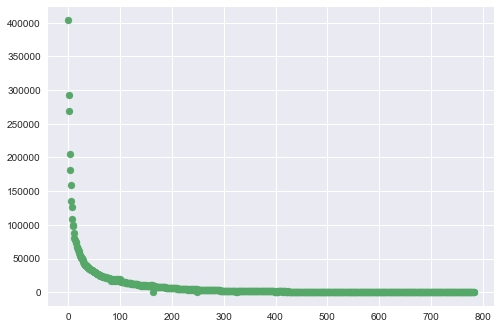

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(range(784),eigen)
plt.show()

# Calculating the principal components

In [18]:
pc=np.dot(t_arr,eigvec)
print pc.shape

(10000L, 2L)


# Scatter plot of Principal components

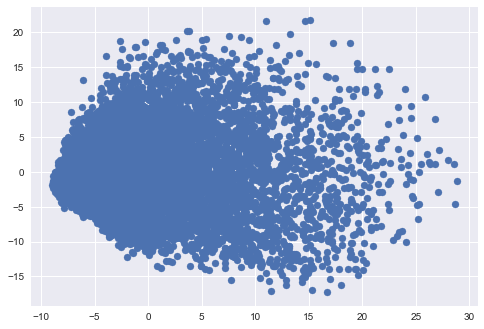

In [19]:
plt.scatter(pc[:,1],pc[:,0])
plt.show()

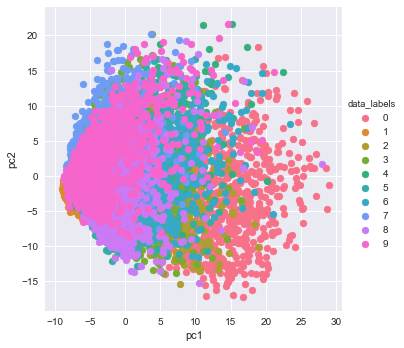

In [21]:
new=pd.DataFrame(
{
    "pc1":pc[:,1],
    "pc2":pc[:,0],
    "data_labels":nl
})
sns.FacetGrid(new, hue="data_labels", size=5).map(plt.scatter, "pc1", "pc2").add_legend();
plt.show();

# PCA using Sklearn

(10000L, 2L)
<type 'numpy.ndarray'>
(10000L, 3L)
        pc1       pc2  data_labels
0 -0.805304 -4.942229          0.0
1  1.788257 -6.903154          3.0
2 -6.920868 -0.306565          7.0
3 -3.837773 -1.152207          6.0
4 -4.519202 -6.203220          6.0


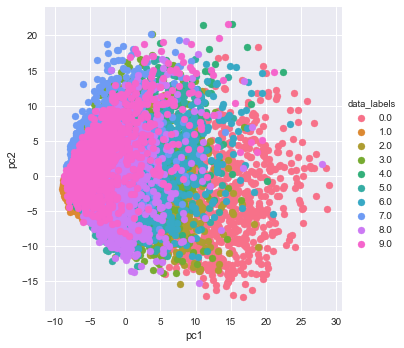

In [23]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
x=pca.fit_transform(t_arr)
print x.shape
print type(x)
xx=np.column_stack((x,nl))
print xx.shape
new1=pd.DataFrame(data=xx,columns=("pc1","pc2","data_labels"))
print new1.head()
sns.FacetGrid(new1, hue="data_labels", size=5).map(plt.scatter, "pc1", "pc2").add_legend();
plt.show();

# Conclusion
By observing the graph of scikit learn and the process of finding the eigen vectors of covaraince matrix we find that 
784 dimensional data has been reduced to 2 dimensions using which we can find the different digits of MNIST dataset.

 <pre>
 1. Please download the data set and extract it to current directory
 2. Run the above cells you get the data in readable formate and pixel formate (60000 * 28 * 28), you can do operations on train_data
 3. Implement the PCA algorithm on the train data.
     i.   You can do the pricipal component analysis on smaller data &lt; 60000 (not less than 10k points) data points
     ii.  Plot the eigen values and eigen vectors
     iii. Find the varaince explained based on the eigen values we got in step (ii)
     iii. Select top two eigen values, corresponding eigen vectors and project the data points on those vectors
     iv.  Plot the resultent lower dimension points with hue="data_labels"
 4. Use the sklearn libraries pca function
     i.   Find out the amount of variance explained by each component, select the top components based on this result
     ii.  Transform the data into lower dimensional data
     iii. Plot the resultent lower dimension points with hue="data_labels"
 5. Compare the result of both step 3 and step 4
</pre>